## Autoencoder(ECG)

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset=pd.read_csv("ecg.csv", header=None)
dataset

0         1         2         3         4         5         6    \
0    -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1    -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2    -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3     0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4     0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   
...        ...       ...       ...       ...       ...       ...       ...   
4993  0.608558 -0.335651 -0.990948 -1.784153 -2.626145 -2.957065 -2.931897   
4994 -2.060402 -2.860116 -3.405074 -3.748719 -3.513561 -3.006545 -2.234850   
4995 -1.122969 -2.252925 -2.867628 -3.358605 -3.167849 -2.638360 -1.664162   
4996 -0.547705 -1.889545 -2.839779 -3.457912 -3.929149 -3.966026 -3.492560   
4997 -1.351779 -2.209006 -2.520225 -3.061475 -3.065141 -3.030739 -2.622720   

           7         8         9    ...       131       132       133  \
0    -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958   
1    -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490   
2    -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377   
3    -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345   
4    -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025   
...        ...       ...       ...  ...       ...       ...       ...   
4993 -2.664816 -2.090137 -1.461841  ...  1.757705  2.291923  2.704595   
4994 -1.593270 -1.075279 -0.976047  ...  1.388947  2.079675  2.433375   
4995 -0.935655 -0.866953 -0.645363  ... -0.472419 -1.310147 -2.029521   
4996 -2.695270 -1.849691 -1.374321  ...  1.258419  1.907530  2.280888   
4997 -2.044092 -1.295874 -0.733839  ... -1.512234 -2.076075 -2.586042   

           134       135       136       137       138       139  140  
0     0.578621  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1     0.724046  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2    -0.021919 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3     0.842069  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4     1.371682  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  
...        ...       ...       ...       ...       ...       ...  ...  
4993  2.451519  2.017396  1.704358  1.688542  1.629593  1.342651  0.0  
4994  2.159484  1.819747  1.534767  1.696818  1.483832  1.047612  0.0  
4995 -3.221294 -4.176790 -4.009720 -2.874136 -2.008369 -1.808334  0.0  
4996  1.895242  1.437702  1.193433  1.261335  1.150449  0.804932  0.0  
4997 -3.322799 -3.627311 -3.437038 -2.260023 -1.577823 -0.684531  0.0  

[4998 rows x 141 columns]

In [3]:
# x=dataset.values
# y=np.zeros(x.shape[0])
# x=dataset.drop(140, axis=1)
x= StandardScaler().fit_transform(dataset.drop(140, axis=1))
y=dataset[140]

In [4]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
# scaler= StandardScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

In [6]:
input_dim, encoding_dim= x_train.shape[1], 16
encoder= Sequential([
    InputLayer(input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(encoding_dim, activation='relu')
])

decoder=Sequential([
    InputLayer(input_shape=(encoding_dim,)),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
autoencoder=Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))
autoencoder.summary()

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0223 - val_loss: 0.9741
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0050 - val_loss: 0.9713
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9461 - val_loss: 0.9707
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9709 - val_loss: 0.9705
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9847 - val_loss: 0.9702
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9881 - val_loss: 0.9701
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9613 - val_loss: 0.9700
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9681 - val_loss: 0.9699
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9908 - val_loss: 0.9699
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0262 - val_loss: 0.9698


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 16)                  │           5,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 140)                 │           5,164 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,614 (119.59 KB)

 Trainable params: 10,204 (39.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,410 (79.73 KB)

In [8]:
predictions= autoencoder.predict(x_test)
mse= np.mean(np.power(x_test-predictions,2), axis=1)
threshold= np.percentile(mse, 95)

anomalies= np.where(mse>threshold, 1, 0)
print("anomalies: ", np.sum(anomalies))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
anomalies:  50


In [9]:
print("accuracy: ", accuracy_score(y_test, anomalies))
print("conf matrix: \n", confusion_matrix(y_test, anomalies))
print("Class report: \n", classification_report(y_test, anomalies))
      

accuracy:  0.403
conf matrix: 
 [[381  28]
 [569  22]]
Class report: 
               precision    recall  f1-score   support

         0.0       0.40      0.93      0.56       409
         1.0       0.44      0.04      0.07       591

    accuracy                           0.40      1000
   macro avg       0.42      0.48      0.31      1000
weighted avg       0.42      0.40      0.27      1000



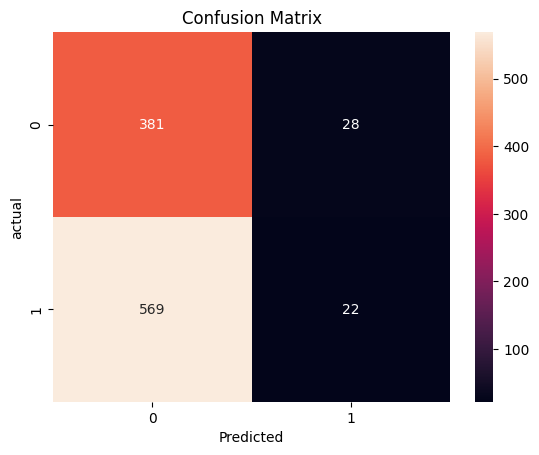

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, anomalies), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()